In [19]:
import pandas as pd
import plotly.express as px
import numpy as np

In [47]:
dfPrice = pd.read_csv("histgoldprices.csv")
dfPrice.head()

,Date,Price
0,1833-01,18.93
1,1833-02,18.93
2,1833-03,18.93
3,1833-04,18.93
4,1833-05,18.93


For my initial dataset I found a very simple csv file (or set of files) that cover the price of gold going to back to ~1840. 
I then chose to investigate further to determine where (or if) there is an original data set. What I discovered is that they are using two different data sources. Once covers the distant past and the other covers recent history.
1. Combined Dataset: https://datahub.io/core/gold-prices#notes-from-the-sources
2. Past Dataset (National Mining Association): https://nma.org/wp-content/uploads/2023/02/his_gold_prices_1833_pres_2023.pdf
3. Recent Dataset (World Gold Council): https://www.gold.org/download/file/8369/Prices.xlsx

I will use the combined dataset for this project. I believe in cases where some of the dates in the two different files are overlapping they used some algorithm or formula to average the figures. These values are close enough for our purposes. However, I did identify a few APIs that have real time precious metals prices. I would love to work with them but I just don't have the time right now to learn a new API (especially considering I don't necessarily know the quality of documentation or design from a cursory glance)

As another note I am going to reduce the numbers of items being printed to the screen in the saved file for github

In [21]:
missing_values = dfPrice.isnull().sum()
print(missing_values)

Date     0
Price    0
dtype: int64


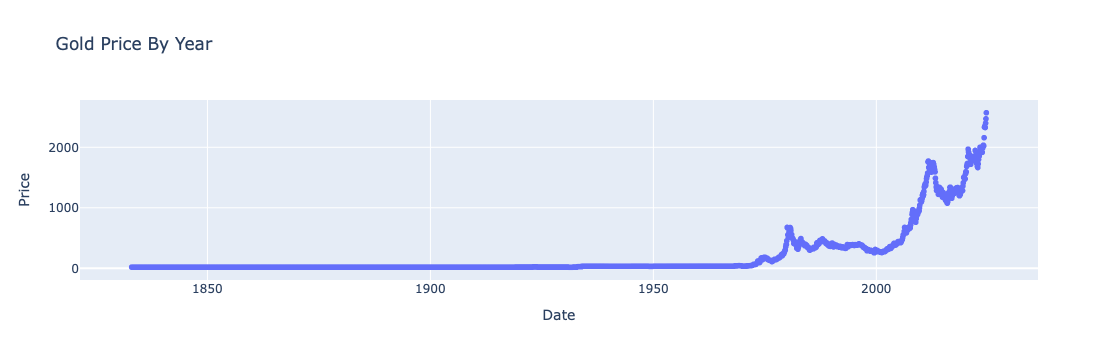

In [22]:
#This visual was just an initial see what things look like step
fig = px.scatter(dfPrice, x = 'Date', y='Price', title='Gold Price By Year')
fig.show()

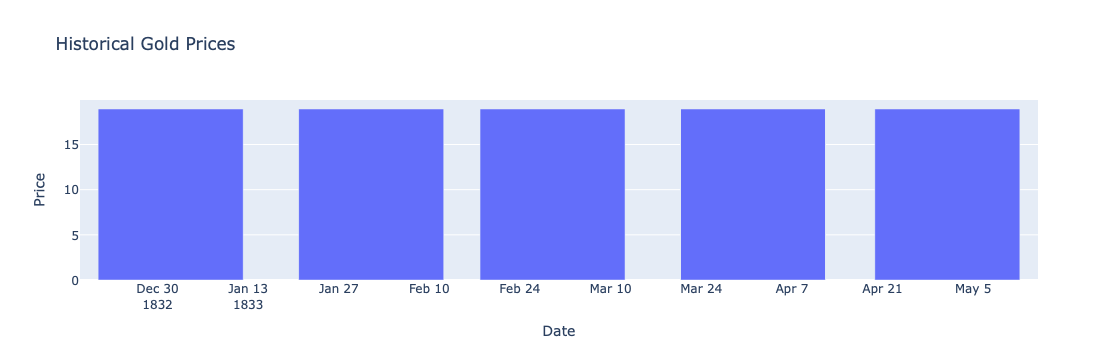

In [23]:
#This bar chart as discussed was just an experiment. I knew in advance that this would likely not be ideal. At least not for this
#specific data. However, because of this experiment I learned that there are some potential limitations in terms of the amount of data and
# the different graph types.
# Convert the Date column to datetime format
dfPrice['Date'] = pd.to_datetime(dfPrice['Date'], format='%Y-%m')

fig1 = px.bar(dfPrice.head(), x='Date', y='Price', title='Historical Gold Prices')
fig1.show()

In [24]:
dfInflation = pd.read_csv("InflationDataUS.csv")
dfInflation

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1958,3.2,3.2,2.8,2.4,2.4,2.1,2.4,2.1,1.7,1.7,1.7,1.7
1,1959,1.7,1.7,1.7,1.7,2.0,2.0,2.0,2.0,2.4,2.7,2.0,2.0
2,1960,2.0,2.3,2.0,2.0,1.7,1.7,1.3,1.3,1.0,1.0,1.0,1.0
3,1961,1.0,0.7,0.7,1.0,1.0,1.0,1.3,1.3,1.6,1.3,1.3,1.3
4,1962,1.3,1.3,1.6,1.3,1.6,1.6,1.3,1.3,1.3,1.3,1.3,1.3
5,1963,1.0,1.0,1.0,1.3,1.0,1.3,1.3,1.6,1.3,1.3,1.6,1.6
6,1964,1.9,1.9,1.9,1.6,1.6,1.6,1.6,0.9,1.3,1.3,1.2,1.2
7,1965,1.6,1.6,1.2,1.6,1.6,1.2,1.2,1.6,1.5,1.5,1.2,1.5
8,1966,0.9,1.2,1.5,1.8,2.1,2.4,2.8,3.1,3.0,3.3,3.6,3.3
9,1967,3.6,3.6,3.6,3.3,3.3,3.3,3.3,3.3,3.6,3.5,3.5,3.8


In [25]:
# Fill missing values with NaN
#Was trying to see if maybe we had empty cells somewhere and possibly fill them
#Also was thinking maybe white space was the problem
dfInflation.fillna(np.nan, inplace=True)
dfInflation.columns = dfInflation.columns.str.strip()

Turns out neither of these were the problem. For this step the issue was that we were missing the last 3 months of 2024 of data because of course it hasn't happened yet..... I won't say how long that took me to realize. I went back and forth about how to fill those and decided on 0's as there is no data available, but I also at the time assumed NaN values were breaking my melt.  

In [26]:
#Duplicating some work down here but also decided to export the data frame so I could look at it in a spreadsheet tool to see where
#missing data may be.
# Fill missing values with NaN
dfInflation.fillna(np.nan, inplace=True)
print(dfInflation.columns)
print(dfInflation.head())
print(dfInflation.isnull().sum())
# Export the DataFrame to a CSV file to observe it in 
dfInflation.to_csv('exported_inflation_data.csv', index=False)
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')
   Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0  1958  3.2  3.2  2.8  2.4  2.4  2.1  2.4  2.1  1.7  1.7  1.7  1.7
1  1959  1.7  1.7  1.7  1.7  2.0  2.0  2.0  2.0  2.4  2.7  2.0  2.0
2  1960  2.0  2.3  2.0  2.0  1.7  1.7  1.3  1.3  1.0  1.0  1.0  1.0
3  1961  1.0  0.7  0.7  1.0  1.0  1.0  1.3  1.3  1.6  1.3  1.3  1.3
4  1962  1.3  1.3  1.6  1.3  1.6  1.6  1.3  1.3  1.3  1.3  1.3  1.3
Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
dtype: int64


In [27]:
#tried transposing the data frame to look at values from a different perspective
print(dfInflation.T)

          0       1       2       3       4       5       6       7       8   \
Year  1958.0  1959.0  1960.0  1961.0  1962.0  1963.0  1964.0  1965.0  1966.0   
Jan      3.2     1.7     2.0     1.0     1.3     1.0     1.9     1.6     0.9   
Feb      3.2     1.7     2.3     0.7     1.3     1.0     1.9     1.6     1.2   
Mar      2.8     1.7     2.0     0.7     1.6     1.0     1.9     1.2     1.5   
Apr      2.4     1.7     2.0     1.0     1.3     1.3     1.6     1.6     1.8   
May      2.4     2.0     1.7     1.0     1.6     1.0     1.6     1.6     2.1   
Jun      2.1     2.0     1.7     1.0     1.6     1.3     1.6     1.2     2.4   
Jul      2.4     2.0     1.3     1.3     1.3     1.3     1.6     1.2     2.8   
Aug      2.1     2.0     1.3     1.3     1.3     1.6     0.9     1.6     3.1   
Sep      1.7     2.4     1.0     1.6     1.3     1.3     1.3     1.5     3.0   
Oct      1.7     2.7     1.0     1.3     1.3     1.3     1.3     1.5     3.3   
Nov      1.7     2.0     1.0     1.3    

In [28]:
# Initial DataFrame
print("Initial DataFrame:\n", dfInflation.head(12))

#Melt the Inflation DataFrame to turn months into rows
dfInflationNormalized = dfInflation.melt(
    id_vars=['Year'], 
    value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    var_name='Month', 
    value_name='Inflation'
)
print("\nAfter melting:\n", dfInflationNormalized.head(24))  # Print more rows for motnhs
print("\nColumns after melting:\n", dfInflationNormalized.columns)  # checking columns

# Print the variable being used for mapping
month_mapping = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
                 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
print("\nMonth mapping dictionary:\n", month_mapping)

# Map month abbreviations to numbers
dfInflationNormalized['Month'] = dfInflationNormalized['Month'].map(month_mapping)
print("\nAfter mapping months:\n", dfInflationNormalized.head(12))  # Print to inspect month conversion

# Concatenate year and month with a - between then convert that to 
dfInflationNormalized['Date'] = dfInflationNormalized['Year'].astype(str) + '-' + dfInflationNormalized['Month']
dfInflationNormalized['Date'] = pd.to_datetime(dfInflationNormalized['Date'], format='%Y-%m')

Initial DataFrame:
     Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0   1958  3.2  3.2  2.8  2.4  2.4  2.1  2.4  2.1  1.7  1.7  1.7  1.7
1   1959  1.7  1.7  1.7  1.7  2.0  2.0  2.0  2.0  2.4  2.7  2.0  2.0
2   1960  2.0  2.3  2.0  2.0  1.7  1.7  1.3  1.3  1.0  1.0  1.0  1.0
3   1961  1.0  0.7  0.7  1.0  1.0  1.0  1.3  1.3  1.6  1.3  1.3  1.3
4   1962  1.3  1.3  1.6  1.3  1.6  1.6  1.3  1.3  1.3  1.3  1.3  1.3
5   1963  1.0  1.0  1.0  1.3  1.0  1.3  1.3  1.6  1.3  1.3  1.6  1.6
6   1964  1.9  1.9  1.9  1.6  1.6  1.6  1.6  0.9  1.3  1.3  1.2  1.2
7   1965  1.6  1.6  1.2  1.6  1.6  1.2  1.2  1.6  1.5  1.5  1.2  1.5
8   1966  0.9  1.2  1.5  1.8  2.1  2.4  2.8  3.1  3.0  3.3  3.6  3.3
9   1967  3.6  3.6  3.6  3.3  3.3  3.3  3.3  3.3  3.6  3.5  3.5  3.8
10  1968  4.1  4.1  4.4  4.4  4.3  4.6  4.9  4.9  4.9  4.8  5.1  5.1
11  1969  5.1  5.3  5.6  6.1  6.1  5.8  5.8  5.8  6.0  6.0  5.9  6.2

After melting:
     Year Month  Inflation
0   1958   Jan        3.2
1   1959   Jan

In [29]:
#Was trying to see how one year looked to check if all of the months were being concatenated.
dfInflationNormalized[dfInflationNormalized['Year'] == 1958].head(12)

,Year,Month,Inflation,Date
0,1958,01,3.2,1958-01-01
67,1958,02,3.2,1958-02-01
134,1958,03,2.8,1958-03-01
201,1958,04,2.4,1958-04-01
268,1958,05,2.4,1958-05-01
335,1958,06,2.1,1958-06-01
402,1958,07,2.4,1958-07-01
469,1958,08,2.1,1958-08-01
536,1958,09,1.7,1958-09-01
603,1958,10,1.7,1958-10-01


In [48]:
print(dfInflationNormalized.head(10))  # View more rows to ensure other months are present originally 100
print(dfInflationNormalized['Month'].value_counts()) #making sure we have the same amount of months for each yearx

     Year Month  Inflation       Date
0    1958    01        3.2 1958-01-01
67   1958    02        3.2 1958-02-01
134  1958    03        2.8 1958-03-01
201  1958    04        2.4 1958-04-01
268  1958    05        2.4 1958-05-01
335  1958    06        2.1 1958-06-01
402  1958    07        2.4 1958-07-01
469  1958    08        2.1 1958-08-01
536  1958    09        1.7 1958-09-01
603  1958    10        1.7 1958-10-01
Month
01    67
02    67
03    67
04    67
05    67
06    67
07    67
08    67
09    67
10    67
11    67
12    67
Name: count, dtype: int64


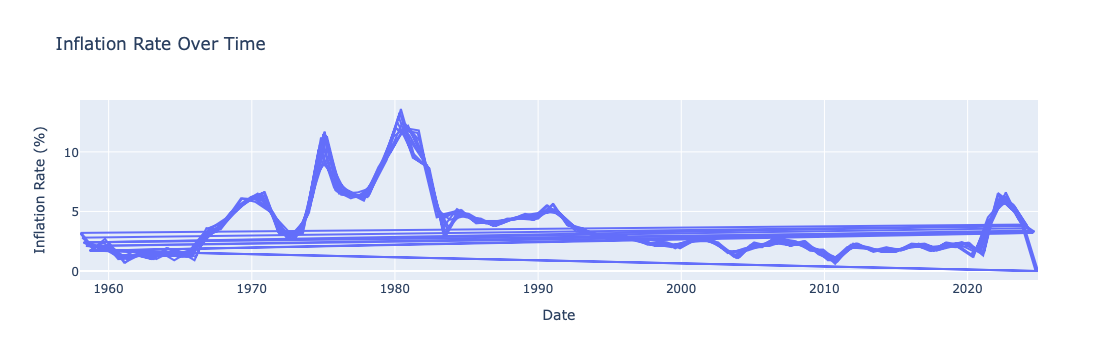

In [31]:
# Initial visual. What in the world is going on. See next cell..
fig = px.line(
    dfInflationNormalized, 
    x='Date', 
    y='Inflation', 
    title='Inflation Rate Over Time', 
    labels={'Inflation': 'Inflation Rate (%)'}, 
    template='plotly'
)

# Display the plot
fig.show()

In [35]:
#I figured out that I just had to sort by date to see that all months for each year were present and so that the values mapped
#correcly in the visual
dfInflationNormalized = dfInflationNormalized.sort_values(by='Date')

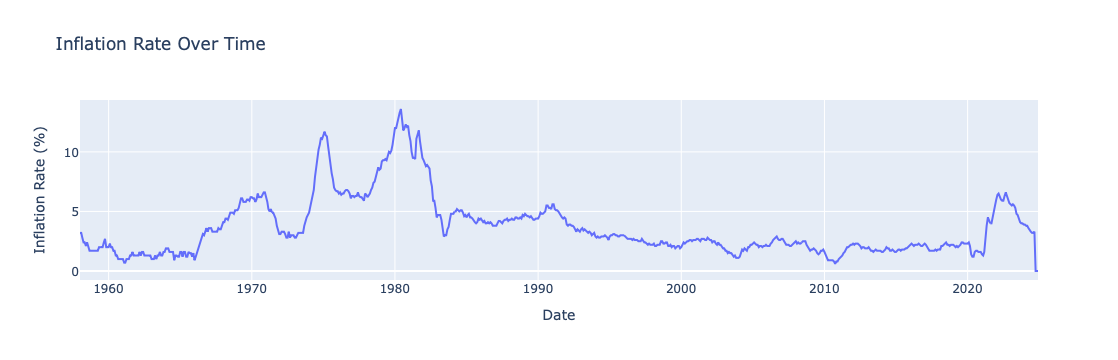

In [36]:
# 6 HOURS!!! to get to this point where I had the inflation data transformed and into a clean visual
fig = px.line(
    dfInflationNormalized, 
    x='Date', 
    y='Inflation', 
    title='Inflation Rate Over Time', 
    labels={'Inflation': 'Inflation Rate (%)'}, 
    template='plotly'
)

# Display the plot
fig.show()

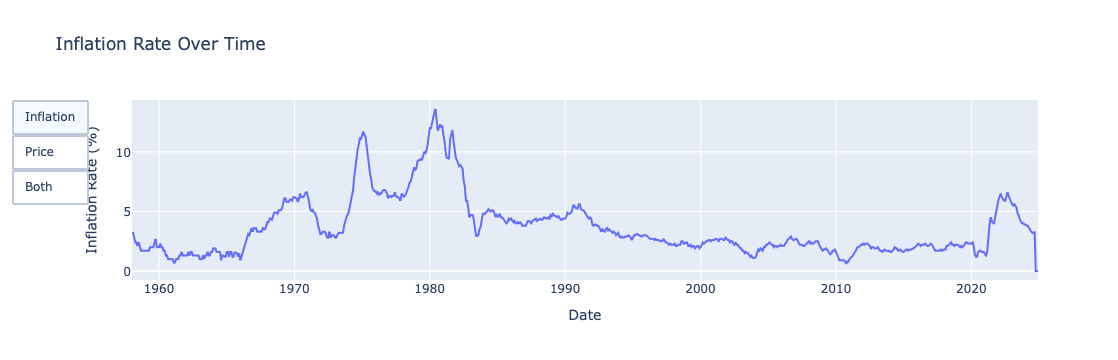

In [40]:
fig = px.line(
    dfInflationNormalized, 
    x='Date', 
    y='Inflation', 
    title='Inflation Rate Over Time', 
    labels={'Inflation': 'Inflation Rate (%)'}, 
    template='plotly'
)


#just experimenting with buttons here
#I would love to try to use this custom CSS I wrote for a website a while ago that had styled buttons
#But that is for future me to do
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="down",
            buttons=list([
                dict(
                    label="Inflation",
                    method="update",
                    args=[{"visible": [True, False]}, {"title": "Inflation"}]
                ),
                dict(
                    label="Price",
                    method="update",
                    args=[{"visible": [False, True]}, {"title": "Price"}]
                ),
                dict(
                    label="Both",
                    method="update",
                    args=[{"visible": [True, True]}, {"title": "Inflation & Price"}]
                )
            ]),
        ),
    ]
)

# Display the plot
fig.show()

Just a beginning experiment with buttons based off of an example I found in the plotly docs examples. Clearly I am going to have to make some
decisions about how to display this data. The gold price being so high relative to the inflation data is schewing the combined chart. That will have to wait for tomorrow. Although, I think I would like to try to make this work using just Plotly Express charts. Something to also think about.

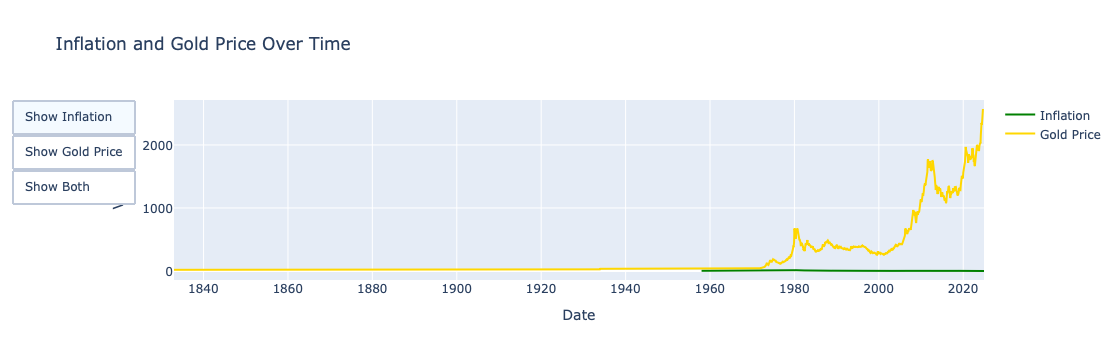

In [49]:
import plotly.graph_objects as go

# create figure
fig = go.Figure()

# trace for inflation
fig.add_trace(go.Scatter(
    x=dfInflationNormalized['Date'], 
    y=dfInflationNormalized['Inflation'], 
    mode='lines', 
    name='Inflation',
    line=dict(color='green')
))

# trace for gold price
fig.add_trace(go.Scatter(
    x=dfPrice['Date'], 
    y=dfPrice['Price'], 
    mode='lines', 
    name='Gold Price',
    line=dict(color='gold')
))

# buttons for  toggling visibility
#todo - figure out how to get buttons not to cover axis labels
#legend disappears when only chowing gold price
fig.update_layout(
    title='Inflation and Gold Price Over Time',
    xaxis_title='Date',
    yaxis_title='Value',
    template='plotly',
    updatemenus=[
        dict(
            type="buttons",
            direction="down",
            buttons=[
                dict(
                    label="Show Inflation",
                    method="update",
                    args=[{"visible": [True, False]},
                          {"title": "Inflation Over Time"}]
                ),
                dict(
                    label="Show Gold Price",
                    method="update",
                    args=[{"visible": [False, True]},
                          {"title": "Gold Price Over Time"}]
                ),
                dict(
                    label="Show Both",
                    method="update",
                    args=[{"visible": [True, True]},
                          {"title": "Inflation and Gold Price Over Time"}]
                )
            ],
        )
    ]
)

# Display the plot
fig.show()


Just simply brought over a snippet from Plotly's docs to mess around with Dash. I think  today's class will certainly help me as I was not sure what I was doing.

In [34]:
from dash import Dash, html, dcc, callback, Output, Input

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_unfiltered.csv')

app = Dash()

app.layout = html.Div([
    html.H1(children='Title of Dash App', style={'textAlign': 'center'}),
    dcc.Dropdown(df.country.unique(), 'Canada', id='dropdown-selection'),
    dcc.Graph(id='graph-content')
])

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)
def update_graph(value):
    dff = df[df.country==value]
    return px.line(dff, x='year', y='pop')

if __name__ == '__main__':
    app.run(debug=True)

Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


SystemExit: 1

/opt/anaconda3/envs/indata_fa24/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.

